Análise de churn em instutuição financeira ficitícia

Recebi os dados abaixo e irei realizar a análise exploratória para verificar qual público possui mais aptidão para deixar de ser cliente da instituição financeira. 

DADOS RECEBIDOS E ANALISADOS:

Primeiramente, é necessário entendermos melhor a base de dados que será estudada.

Quantidade de linhas: 10.000

Quantidade de colunas: 13

A identificação das colunas:

CustomerId: identificação do cliente.

Surname: sobrenome do cliente.

CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência.

Geography: país que o serviço é oferecido.

Gender: sexo do cliente.

Age: idade do cleinte.

Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

Balance: saldo da conta corrente.

NumOfProducts: número de produtos bancários adquiridos.

HasCrCard: se tem cartão de credito ou não. (Sim = 1 | Não = 0)

IsActiveMember: se é um cliente com conta ativa. (Ativo = 1)

EstimatedSalary: salário estimado.

Exited: cliente deixou de ser cliente do banco ou não. (Churn = 1)


Bibliotecas utilizadas:

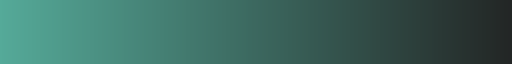

In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("dark:#5A9_r", as_cmap=True)


Dados utilizados:

In [40]:
df_churn = pd.read_csv('churn.csv', index_col='RowNumber')
df_churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [10]:
#df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [41]:
#retirei as colunas com informações desnecessárias para a análise

arr_delete = ['CustomerId', 'Surname']
df_churn.drop(arr_delete, axis=1, inplace = True)
df_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [64]:
#Função para visualização de dados estatisticos. 

df_churn.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [43]:
#Número de clientes perdidos

df_churn['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [34]:
df_churn.groupby(['Exited']).mean()

C:\Users\JONATH~1\AppData\Local\Temp/ipykernel_16532/2868426550.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_churn.groupby(['Exited']).mean()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


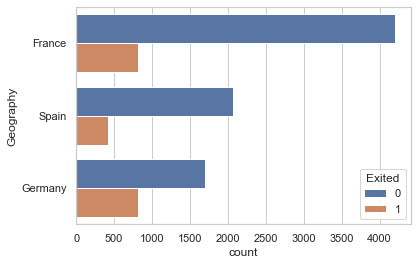

In [108]:
sns.countplot(y='Geography', hue = 'Exited',data = df_churn);

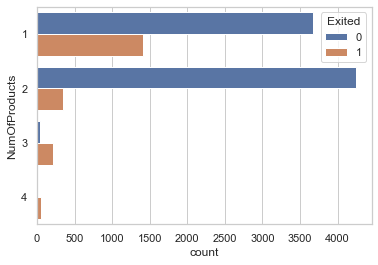

In [109]:
sns.countplot(y='NumOfProducts', hue = 'Exited',data = df_churn);

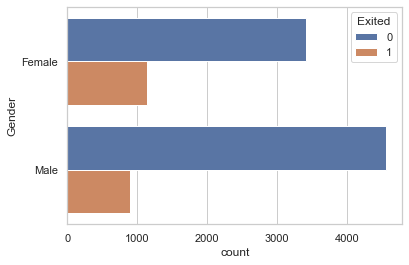

In [110]:
sns.countplot(y='Gender', hue = 'Exited',data = df_churn);

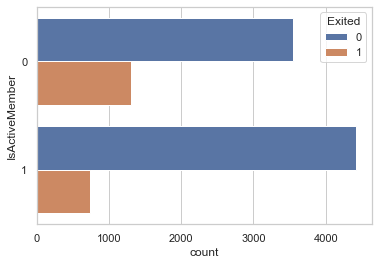

In [104]:
sns.countplot(y='IsActiveMember', hue = 'Exited',data = df_churn);

C:\Users\JONATH~1\AppData\Local\Temp/ipykernel_16532/2516165313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_churn.corr(), linewidths = 1, cbar= True, annot=True, linecolor='green', cmap="Greens")


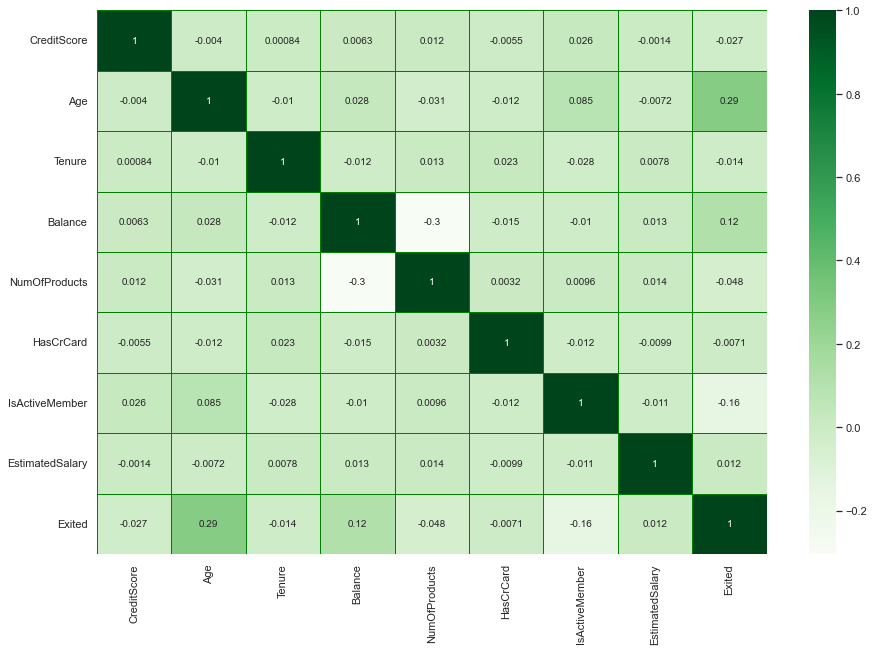

In [111]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_churn.corr(), linewidths = 1, cbar= True, annot=True, linecolor='green', cmap="Greens")
plt.show()

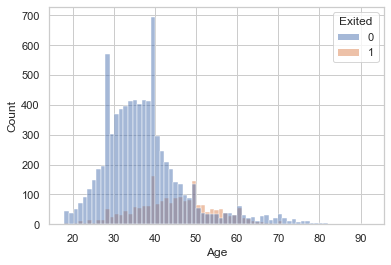

In [114]:
sns.histplot(data=df_churn, x="Age", hue='Exited');

<AxesSubplot: xlabel='CreditScore', ylabel='Count'>

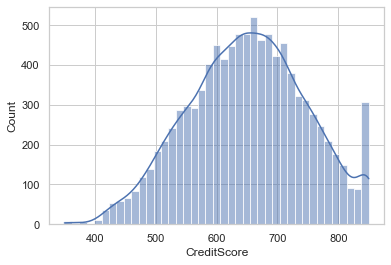

In [95]:
sns.histplot(data=df_churn, x="CreditScore", kde=True)

CONCLUSÕES

Analisando em quais países o índice de churn foi maior, é possível notar que os países com cultura mais introspectiva tiveram maior taxa de churn, como Alemanha e França. A Espanha possui população com hábitos mais extrovertidos apresentou menor churn. 

A idade influenciou diretamente o churn dos usuários. Quanto maior a idade maior a probabilidade de perder o cliente. 

A perda de clientes que utilizam apenas um serviço também foi maior. 

RECOMENDAÇÕES

Realizar pesquisas de satisfação e colher NPS de todos os clientes para possuir dados mais conclusivos sobre o churn.

Desenvolver produtos voltados para a população acima de 40 anos e no idioma francês e Alemão. 

Oferecer pacotes de serviços afim de aumentar o número de serviços que os clientes utilizam. 